# What is MNIST dataset.
Modified National Institute of Science and Technology dataset is a collection of 60,000 small square 28x28 pixel greyscale images of handwritten single digits between 0 and 9.

This projects analyze the 60,000 data and predicts the handwritten number to the exact value. Also it predics the number given as an input.

# importing all the neccessary libraries which are required for the project.
numpy: numerical python, used to create arrays and manipulate them<br>
matplotlib.pyplot: It is the library which is used to plot the data<br> 
tensorflow: library used to implement machine learning algorithms and the MNIST data is imported from tensorflow.keras

In [1]:
import tensorflow as tf #pip install tensorflow 
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np
import cv2

# importing the MNIST datasets from tensorflow keras

In [3]:
mnist=tf.keras.datasets.mnist

# splits the data to training and testing set. 

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [6]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#All the images look like the image given below. There contains 60,0000 data which are single digit numbers(0-9) handwritten by many people.

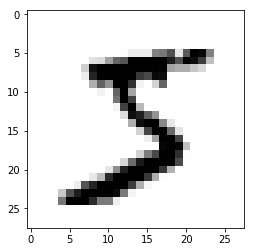

In [7]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

# normalize the training and testing data.
 
 The training and testing data are normalized to range of 0 to 1. Similar to<br>
 x_train//255<br>
 x_test//255
    

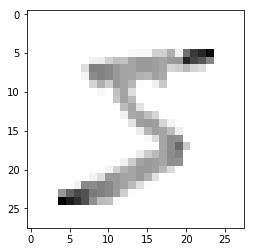

In [8]:
x_train=tf.keras.utils.normalize(x_train,axis=1) #normalizing the training data
x_test=tf.keras.utils.normalize(x_test,axis=1)   #normalizing the testing data
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# the training and testing dataset is reshaped to apply CNN algorithm.

In [10]:
rs_xtrain=np.array((x_train).reshape(-1,28,28,1)) #reshaped to apply CNN
rs_xtest=np.array((x_test).reshape(-1,28,28,1))
print("the dimension of training sample after reshaping: ",rs_xtrain.shape)

the dimension of training sample after reshaping:  (60000, 28, 28, 1)


# The machine learning model is applied to the trianing dataset.

Here we apply the sequential model, where the data is modeled to a linear stack of layers.

In [11]:
model=tf.keras.models.Sequential([
  layers.Conv2D(filters=64, kernel_size=(3,3),activation="relu",input_shape=rs_xtrain.shape[1:]),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
  layers.MaxPooling2D(pool_size=(2,2)),
    
    
    #fully connected neural network
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(10,activation="softmax"),
])

# After training the model using CNN the summary of the data is given below.


In [125]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_7 (Dense)              (None, 32)               

In [14]:
model.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])


# the training model has accuracy of 99.7%. 

In [15]:
model.fit(rs_xtrain,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 49s 31ms/step - loss: 0.2167 - accuracy: 0.9330 - val_loss: 0.0867 - val_accuracy: 0.9732
Epoch 2/5
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0692 - accuracy: 0.9780 - val_loss: 0.0660 - val_accuracy: 0.9802
Epoch 3/5
1313/1313 [==============================] - 45s 35ms/step - loss: 0.0474 - accuracy: 0.9850 - val_loss: 0.0646 - val_accuracy: 0.9813
Epoch 4/5
1313/1313 [==============================] - 44s 33ms/step - loss: 0.0354 - accuracy: 0.9887 - val_loss: 0.0611 - val_accuracy: 0.9818
Epoch 5/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0468 - val_accuracy: 0.9868


In [16]:
model.evaluate(rs_xtest,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0373 - accuracy: 0.9881


[0.037286993116140366, 0.988099992275238]

# the test data set has an accuracy of 98.88%.

In [129]:
predictions=model.predict([rs_xtest])

In [130]:
predictions

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [131]:
print(np.argmax(predictions[1]))

2


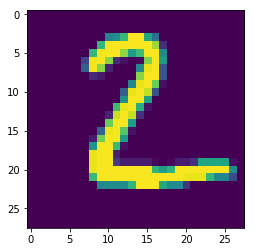

In [132]:
plt.imshow(x_test[1])

# the model is predicted with great accuracy.

0


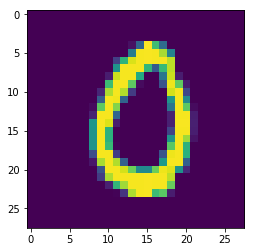

In [133]:
print(np.argmax(predictions[1001]))
plt.imshow(x_test[1001])
plt.show()

# this model also predicts those images written in users' system using openCv. 

In [18]:
import cv2

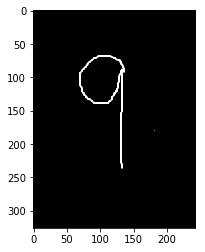

In [31]:
my_img=cv2.imread("nine.png")
plt.imshow(my_img)
plt.show()


In [32]:
my_img.shape
my_imggray=cv2.cvtColor(my_img,cv2.COLOR_BGR2GRAY)

In [33]:
my_img=cv2.resize(my_imggray,(28,28),interpolation=cv2.INTER_AREA)

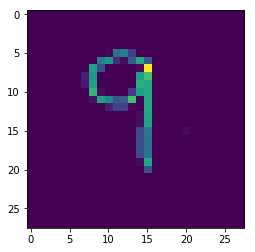

In [34]:
plt.imshow(my_img)

In [35]:
tf.keras.utils.normalize(my_img,axis=1)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [36]:
my_image=np.array(my_img.reshape(-1,28,28,1))

In [37]:
predict=model.predict(my_image)

In [38]:
print(np.argmax(predict))

9
